# Differential equations



## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

Example 1. Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [70]:
#starting value
y = 1

#Number of iterations 
nmax = 100

#Stepsize 
h = 0.1

#Collect data
t_values = [0]
y_values = [y]

In [72]:
for i in range(1, nmax+1): #when we put 1, python doesn't count from zero, it counts from 1. 
    f = -y
    y = y + f * h
    t_values.append(i*h)
    y_values.append(y)

In [74]:
y

2.656139888758746e-05

In [76]:
t_values

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3000000000000003,
 2.4000000000000004,
 2.5,
 2.6,
 2.7,
 2.8000000000000003,
 2.9000000000000004,
 3.0,
 3.1,
 3.2,
 3.3000000000000003,
 3.4000000000000004,
 3.5,
 3.6,
 3.7,
 3.8000000000000003,
 3.9000000000000004,
 4.0,
 4.1000000000000005,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6000000000000005,
 4.7,
 4.800000000000001,
 4.9,
 5.0,
 5.1000000000000005,
 5.2,
 5.300000000000001,
 5.4,
 5.5,
 5.6000000000000005,
 5.7,
 5.800000000000001,
 5.9,
 6.0,
 6.1000000000000005,
 6.2,
 6.300000000000001,
 6.4,
 6.5,
 6.6000000000000005,
 6.7,
 6.800000000000001,
 6.9,
 7.0,
 7.1000000000000005,
 7.2,
 7.300000000000001,
 7.4,
 7.5,
 7.6000000000000005,
 7.7,
 7.800000000000001,
 7.9,
 8.0,
 8.1,
 8.200000000000001,
 8.3,
 8.4,
 8.5,
 8.6,
 8.700000000000001,
 8

In [78]:
np.exp(-nmax*h)

4.5399929762484854e-05

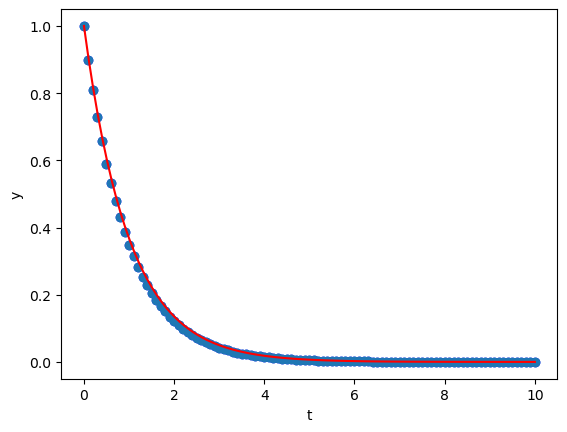

In [80]:
plt.scatter(t_values, y_values, color ='blue')

#write linspace to compare with analytical solution

test_t = np.linspace(0,nmax*h,nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(t_values, y_values)
#Note the blue points are the numerical solution and the red is the analytical solution. 
#you can increase the number of iterations above to notice how it looks different. 

### Define a function that mimics the above 

In [91]:
def eulerODE(f, t0,y0,nmax,h):
    #f: Function
    #t0: Starting time
    #y0: starting value of y
    #nmax: Number of iterations
    #h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1): #when we put 1, python doesn't count from zero, it counts from 1. 
        y = y + f(t,y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values]) #use return, instead of print, so we can assign these values to variables
#all of this gives no output. What we need is to call this function and provide arguments. 

In [95]:
#define function
def f_ODE(t,y):
    return -y


# Euler method
t0 = 0
y0 = 1
nmax = 100
h = 0.1

solution = eulerODE(f_ODE, t0,y0,nmax, h) 

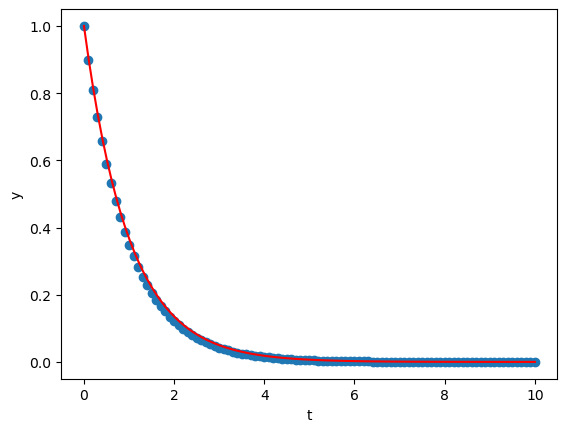

In [99]:
test_t = np.linspace(0,nmax*h,nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])
#notice the plot gives the same as before by using a different method of defining a function.  